<a href="https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs_zh-CN/tutorials/MMClassification_tools_cn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMClassification 命令行工具教程

在本教程中会介绍如下内容：

* 如何安装 MMClassification
* 准备数据
* 准备配置文件
* 使用 shell 命令进行模型训练和测试

## 安装 MMClassification

在使用 MMClassification 之前，我们需要配置环境，步骤如下：

- 安装 Python, CUDA, C/C++ compiler 和 git
- 安装 PyTorch (CUDA 版)
- 安装 mmcv
- 克隆 mmcls github 代码库然后安装

因为我们在 Google Colab 进行实验，Colab 已经帮我们完成了基本的配置，我们可以直接跳过前面两个步骤 。

### 检查环境

In [1]:
%cd /content

/content


In [2]:
!pwd

/content


In [3]:
# 检查 nvcc 版本
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [4]:
# 检查 GCC 版本
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
# 检查 PyTorch 的安装情况
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.9.0+cu111
True


### 安装 MMCV

MMCV 是 OpenMMLab 代码库的基础库。Linux 环境的安装 whl 包已经提前打包好，大家可以直接下载安装。

需要注意 PyTorch 和 CUDA 版本，确保能够正常安装。

在前面的步骤中，我们输出了环境中 CUDA 和 PyTorch 的版本，分别是 11.1 和 1.9.0，我们需要选择相应的 MMCV 版本。

另外，也可以安装完整版的 MMCV-full，它包含所有的特性以及丰富的开箱即用的 CUDA 算子。需要注意的是完整版本可能需要更长时间来编译。

In [6]:
# 安装 mmcv
!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
     |████████████████████████████████| 352 kB 5.2 MB/s 
     |████████████████████████████████| 185 kB 45.4 MB/s 
  Created wheel for mmcv: filename=mmcv-1.3.15-py2.py3-none-any.whl size=509835 sha256=0296cfd1e3e858ece30623050be2953941a442daf0575389030aa25603e5c205
  Stored in directory: /root/.cache/pip/wheels/b2/f4/4e/8f6d2dd2bef6b7eb8c89aa0e5d61acd7bff60aaf3d4d4b29b0
Successfully built mmcv


### 克隆并安装 MMClassification

接着，我们从 github 上克隆下 mmcls 最新代码库并进行安装。

In [7]:
# 下载 mmcls 代码库
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification/

# 从源码安装 MMClassification
!pip install -e . 

Cloning into 'mmclassification'...
remote: Enumerating objects: 4152, done.
remote: Counting objects: 100% (994/994), done.
remote: Compressing objects: 100% (574/574), done.
remote: Total 4152 (delta 476), reused 764 (delta 403), pack-reused 3158
Receiving objects: 100% (4152/4152), 8.20 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (2525/2525), done.
/content/mmclassification
Obtaining file:///content/mmclassification
  Running setup.py develop for mmcls


In [8]:
# 检查 MMClassification 的安装情况
import mmcls
print(mmcls.__version__)

0.16.0


## 准备数据

In [9]:
# 下载分类数据集文件 （猫狗数据集）
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir data
!unzip -q cats_dogs_dataset.zip -d ./data/

--2021-10-21 02:53:27--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2021-10-21 02:53:27--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2e142222b11f678e96f89b0223.dl.dropboxusercontent.com/cd/0/inline/BYaBa5-WWfPf_jhSt9A5JMet_BB55MzZhB2D3RXLo53VGHSIYbVMnFTdccihcsD-kwc9FxBG8qOwqA50z7XD6-3yUXWK9iA0x4L8IV5wegYKilKuDauDKWiNAsbgZoEBg4nC1UWR5pLSiH3j0Dn68b2V/file# [following]
--2021-10-21 02:53:27--  https://uc2e142222b11f678e96f89b0223.dl.dropboxusercontent.com/cd/0/inline/BYaBa5-WWfPf_jhSt9A5JMet_BB55MzZhB2D3RXL

完成下载和解压之后， "Cats and Dogs Dataset" 文件夹下的文件结构如下:
```
data/cats_dogs_dataset
├── classes.txt
├── test.txt
├── val.txt
├── training_set
│   ├── training_set
│   │   ├── cats
│   │   │   ├── cat.1.jpg
│   │   │   ├── cat.2.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.2.jpg
│   │   │   ├── dog.3.jpg
│   │   │   ├── ...
├── val_set
│   ├── val_set
│   │   ├── cats
│   │   │   ├── cat.3.jpg
│   │   │   ├── cat.5.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.1.jpg
│   │   │   ├── dog.6.jpg
│   │   │   ├── ...
├── test_set
│   ├── test_set
│   │   ├── cats
│   │   │   ├── cat.4001.jpg
│   │   │   ├── cat.4002.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.4001.jpg
│   │   │   ├── dog.4002.jpg
│   │   │   ├── ...
```

可以通过 shell 命令 `tree data/cats_dogs_dataset` 查看文件结构。

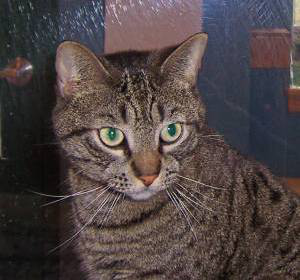

In [10]:
# 获取一张图像可视化
from PIL import Image
Image.open('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

### 支持新的数据集

MMClassification 要求数据集必须将图像和标签放在同级目录下。有两种方式可以支持自定义数据集。

最简单的方式就是将数据集转换成现有的数据集格式（比如 ImageNet）。另一种方式就是新建一个新的数据集类。细节可以查看 [文档](https://github.com/open-mmlab/mmclassification/blob/master/docs_zh-CN/tutorials/new_dataset.md).

在这个教程中，为了方便学习，我们已经将 “猫狗分类数据集” 按照 ImageNet 的数据集格式进行了整理。

除了图片文件外，数据集还包括以下文件：

1. 类别列表。每行代表一个类别。
    ```
    cats
    dogs
    ```
2. 训练/验证/测试标签。
每行包括一个文件名和其相对应的标签。
    ```
    ...
    cats/cat.3769.jpg 0
    cats/cat.882.jpg 0
    ...
    dogs/dog.3881.jpg 1
    dogs/dog.3377.jpg 1
    ...
    ```

## 使用 shell 命令进行模型训练和测试

MMCls 同样提供了命令行工具，提供如下功能:

1. 模型训练
2. 模型微调
3. 模型测试
4. 推理计算

模型训练的过程与模型微调的过程一致，我们已经看到 Python API 的推理和模型微调过程。接下来我们将会看到如何使用命令行工具完成这些任务。更过细节可以参考 [文档](https://github.com/open-mmlab/mmclassification/blob/master/docs_zh-CN/getting_started.md).

### 模型微调

通过命令行进行模型微调步骤如下：

1. 准备自定义数据集
2. 在 py 脚本中修改配置文件
3. 使用命令行工具进行模型微调

第 1 步与之前的介绍一致，我们将会介绍后面两个步骤的内容。

#### 创建一个新的配置文件

为了能够复用不同配置文件中常用的部分，我们支持多配置文件继承。比如模型微调 MobileNetV2 ，新的配置文件可以通过继承 `configs/_base_/models/mobilenet_v2_1x.py` 来创建模型的基本结构。

根据以往的实践，我们通常把完整的配置拆分成四个部分：模型、数据集、优化器、运行设置。每个部分的配置单独保存到一个文件，并放在 `config/_base_` 的对应目录下。

这样一来，在创建新的配置文件时，我们就可以选择继承若干个需要的配置文件，然后覆盖其中需要修改的部分内容。

我们的新配置文件开头的继承部分为：

```python
_base_ = [
    '../_base_/models/mobilenet_v2_1x.py',
    '../_base_/schedules/imagenet_bs256_epochstep.py',
    '../_base_/default_runtime.py'
]
```

这里，因为我们使用了一个新的数据集，所以没有继承任何数据集相关的配置。

此外，也可以不使用这种继承的方式，而直接构建完整的配置文件，比如 `configs/mnist/lenet5.py`.

之后，我们只需要设定配置文件中我们希望修改的部分，其他部分的设置会自动从继承的配置文件中读取。

In [11]:
%%writefile configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py
_base_ = [
    '../_base_/models/mobilenet_v2_1x.py',
    '../_base_/schedules/imagenet_bs256_epochstep.py',
    '../_base_/default_runtime.py'
]

# ---- 模型配置 ----
# 这里使用 init_cfg 来加载预训练模型，通过这种方式，只有主干网络的权重会被加载。
# 另外还修改了分类头部的 num_classes 来匹配我们的数据集。

model = dict(
    backbone=dict(
        init_cfg = dict(
            type='Pretrained', 
            checkpoint='https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth', 
            prefix='backbone')
    ),
    head=dict(
        num_classes=2,
        topk = (1, )
    ))

# ---- 数据集配置 ----
# 我们已经将数据集重新组织为 ImageNet 格式
dataset_type = 'ImageNet'
img_norm_cfg = dict(
     mean=[124.508, 116.050, 106.438],
     std=[58.577, 57.310, 57.437],
     to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', size=224, backend='pillow'),
    dict(type='RandomFlip', flip_prob=0.5, direction='horizontal'),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='ToTensor', keys=['gt_label']),
    dict(type='Collect', keys=['img', 'gt_label'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', size=(256, -1), backend='pillow'),
    dict(type='CenterCrop', crop_size=224),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='Collect', keys=['img'])
]
data = dict(
    # 设置每个 GPU 上的 batch size 和 workers 数, 根据你的硬件来修改这些选项。
    samples_per_gpu=32,
    workers_per_gpu=2,
    # 指定训练集类型和路径
    train=dict(
        type=dataset_type,
        data_prefix='data/cats_dogs_dataset/training_set/training_set',
        classes='data/cats_dogs_dataset/classes.txt',
        pipeline=train_pipeline),
    # 指定验证集类型和路径
    val=dict(
        type=dataset_type,
        data_prefix='data/cats_dogs_dataset/val_set/val_set',
        ann_file='data/cats_dogs_dataset/val.txt',
        classes='data/cats_dogs_dataset/classes.txt',
        pipeline=test_pipeline),
    # 指定测试集类型和路径
    test=dict(
        type=dataset_type,
        data_prefix='data/cats_dogs_dataset/test_set/test_set',
        ann_file='data/cats_dogs_dataset/test.txt',
        classes='data/cats_dogs_dataset/classes.txt',
        pipeline=test_pipeline))

# 设置验证指标
evaluation = dict(metric='accuracy', metric_options={'topk': (1, )})

# ---- 优化器设置 ----
# 通常在微调任务中，我们需要一个较小的学习率，训练轮次可以较短。
# 设置学习率
optimizer = dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=0.0001)
optimizer_config = dict(grad_clip=None)
# 设置学习率调度器
lr_config = dict(policy='step', step=1, gamma=0.1)
runner = dict(type='EpochBasedRunner', max_epochs=2)

# ---- 运行设置 ----
# 每 10 个训练批次输出一次日志
log_config = dict(interval=10)

Writing configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py


#### 使用命令行进行模型微调

我们使用 `tools/train.py` 进行模型微调:

```
python tools/train.py ${CONFIG_FILE} [optional arguments]
```

如果你希望指定训练过程中相关文件的保存位置，可以增加一个参数 `--work_dir ${YOUR_WORK_DIR}`.

通过增加参数 `--seed ${SEED}`，设置随机种子以保证结果的可重复性，而参数 `--deterministic`则会启用 cudnn 的确定性选项，进一步保证可重复性，但可能降低些许效率。

这里我们使用 `MobileNetV2` 和数据集 `CatsDogsDataset` 作为示例

In [12]:
!python tools/train.py \
  configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py \
  --work-dir work_dirs/mobilenet_v2_1x_cats_dogs \
  --seed 0 \
  --deterministic

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/transformer.py:28: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarni

### 测试模型

使用 `tools/test.py` 对模型进行测试:

```
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [optional arguments]
```

这里有一些可选参数可以进行配置:

- `--metrics`: 评价指标。可以在数据集类中找到所有可用的选择，一般对单标签分类任务，我们都可以使用 "accuracy" 进行评价。
- `--metric-options`: 传递给评价指标的自定义参数。比如指定了 "topk=1"，那么就会计算 "top-1 accuracy"。

更多细节请参看 `tools/test.py` 的帮助文档。

这里使用我们微调好的 `MobileNetV2` 模型进行测试

In [13]:
!python tools/test.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py work_dirs/mobilenet_v2_1x_cats_dogs/latest.pth --metrics accuracy --metric-options topk=1

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/transformer.py:28: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarni

### 推理计算

有时我们会希望保存模型在数据集上的推理结果，可以使用如下命令：

```shell
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [--out ${RESULT_FILE}]
```

参数：

- `--out`: 输出结果的文件名。如果不指定，计算结果不会被保存。支持的格式包括json, pkl 和 yml
- `--out-items`: 哪些推理结果需要被保存，可以从 "class_scores", "pred_score", "pred_label" 和 "pred_class" 中选择若干个，或者使用 "all" 来保存所有推理结果。

这些项的具体含义：
- `class_scores`: 各个样本在每个类上的分类得分。
- `pred_score`: 各个样本在预测类上的分类得分。
- `pred_label`: 各个样本预测类的标签。标签文本将会从模型权重文件中读取，如果模型权重文件中没有标签文本，则会使用 ImageNet 的标签文本。
- `pred_class`: 各个样本预测类的 id，为一组整数。
- `all`: 保存以上所有项。
- `none`: 不保存以上任何项。因为输出文件除了推理结果，还会保存评价指标，如果你只希望保存总体评价指标，可以设置不保存任何项，可以大幅减小输出文件大小。

In [14]:
!python tools/test.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py work_dirs/mobilenet_v2_1x_cats_dogs/latest.pth --out results.json --out-items all

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/transformer.py:28: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarni

导出的json 文件中保存了所有样本的推理结果、分类结果和分类得分

class_scores: [1.0, 5.184615757547473e-13]
pred_class: cats
pred_label: 0
pred_score: 1.0


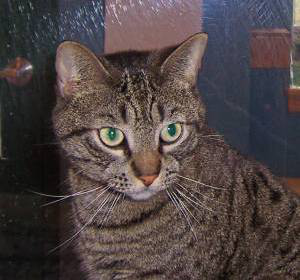

In [15]:
import json

with open("./results.json", 'r') as f:
    results = json.load(f)

# 展示第一张图片的结果信息
print('class_scores:', results['class_scores'][0])
print('pred_class:', results['pred_class'][0])
print('pred_label:', results['pred_label'][0])
print('pred_score:', results['pred_score'][0])
Image.open('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

也可以使用 MMClassification 提供的可视化函数 imshow_infos 更好地展示预测结果。

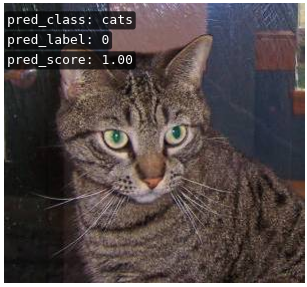

In [16]:
from mmcls.core.visualization import imshow_infos

filepath = 'data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg'

result = {
    'pred_class': results['pred_class'][0],
    'pred_label': results['pred_label'][0],
    'pred_score': results['pred_score'][0],
}

img = imshow_infos(filepath, result)